In [61]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [62]:
iris_df = pd.read_csv('Iris.csv')

In [63]:
#Check data Type
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [64]:
# No Null values found
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [65]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

In [18]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

### Find the distribution of target variable (Class) (1 Marks)

### Plot the distribution of target variable using histogram

[]

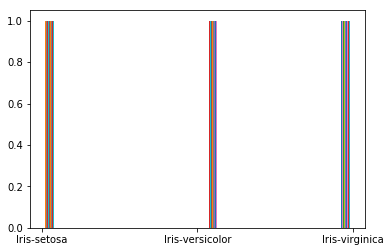

In [66]:
plt.hist(iris_df['Species'])
plt.plot()
# I am not sure why we are asked to draw a histogram for non-numeric variable and what we infer from this

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

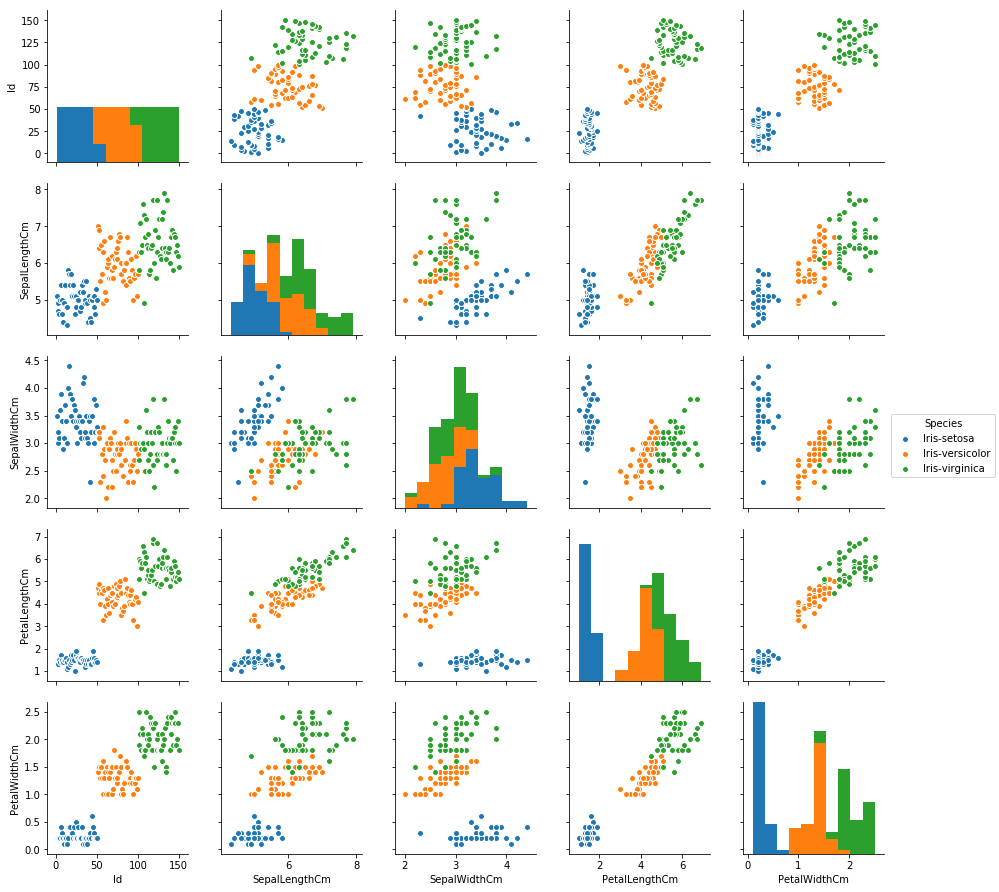

In [77]:
import seaborn as sns
sns.pairplot(iris_df, hue='Species')

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [67]:
iris_df.corr().T
# Sepal length and petallength & width has a strong correlation
# ID is not required as its showing strong correlation with other independant variables
# Petal length and petal width is having strong correlation. So one of them can be dropped as well

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000

In [69]:
#Drop Id variable from data
X = X.drop(['Id'], axis=1)

In [71]:
X.corr().T

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

### Correlation among all variables and give your insights (1 Marks)

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
#=====================================================================================================
# Sepal length and petallength & width has a strong correlation
# ID is not required as its showing strong correlation with other independant variables
# Petal length and petal width is having strong correlation. So one of them can be dropped as well

In [72]:
X = X.drop(['PetalWidthCm'], axis=1)

In [73]:
X.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm
SepalLengthCm       1.000000     -0.109369       0.871754
SepalWidthCm       -0.109369      1.000000      -0.420516
PetalLengthCm       0.871754     -0.420516       1.000000

### Split data in Training and Validation in 80:20 (1 Marks)

In [75]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

### Do Feature Scaling ( 1 Marks)

In [ ]:
# Use StandardScaler or similar methods

### Train and Fit NaiveBayes Model(2 Marks)

In [78]:
#Fit the model
model = GaussianNB()
model.fit(xtrain, ytrain)
print(model)
expected = ytest
#Predict
predicted = model.predict(xtest)

GaussianNB(priors=None)


In [84]:
#Fit the model
model_B = BernoulliNB()
model_B.fit(xtrain, ytrain)
print(model_B)
expected_B = ytest
#Predict
predicted_B = model_B.predict(xtest)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [86]:
#Fit the model
model_NB = MultinomialNB()
model_NB.fit(xtrain, ytrain)
print(model_NB)
expected_NB = ytest
#Predict
predicted_NB = model_NB.predict(xtest)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [81]:
# show Confusion Matrix
from sklearn import metrics
cm1=metrics.confusion_matrix(ytest,predicted)
print(cm1)

[[11  0  0]
 [ 0 11  2]
 [ 0  2  4]]


In [87]:
# show Confusion Matrix
from sklearn import metrics
cm2=metrics.confusion_matrix(ytest,predicted_B)
print(cm2)

[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]


In [88]:
# show Confusion Matrix
from sklearn import metrics
cm3=metrics.confusion_matrix(ytest,predicted_NB)
print(cm3)

[[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]


In [82]:
# show accuracy
acc=metrics.accuracy_score(ytest,predicted)
print(acc)

0.8666666666666667


In [89]:
# show accuracy
acc_B=metrics.accuracy_score(ytest,predicted_B)
print(acc_B)

0.2


In [90]:
# show accuracy
acc_NB=metrics.accuracy_score(ytest,predicted_NB)
print(acc_NB)

0.5666666666666667


In [ ]:
#Not sure if I have done correctly but other two models of Naive Bayes are giving very poor results
#GauusianNB is giving 87% accuracy

In [83]:
#Show precision and Recall metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.85      0.85      0.85        13
 Iris-virginica       0.67      0.67      0.67         6

    avg / total       0.87      0.87      0.87        30

[[11  0  0]
 [ 0 11  2]
 [ 0  2  4]]
